In [4]:
import math

In [6]:
motion_log = '/Users/phillipchristoffersen/PycharmProjects/openTAMP/opentamp/experiment_logs/namo_objs1_1/pointer_test_log_71/MotionInfo_MotionServer0_log.txt'

In [30]:
import json
import matplotlib.pyplot as plt

var = [{'n_explore': 0,
 'n_fail_explore': 0,
 'n_fail_ff': 0,
 'n_fail_midcond': 0,
 'n_fail_plans': 0,
 'n_fail_postcond': 0,
 'n_fail_precond': 0,
 'n_fail_rollout_explore': 0,
 'n_fail_rollout_ff': 0,
 'n_fail_rollout_midcond': 0,
 'n_fail_rollout_postcond': 0,
 'n_fail_rollout_precond': 0,
 'n_ff': 0,
 'n_midcond': 0,
 'n_plans': 0,
 'n_postcond': 0,
 'n_precond': 0,
 'opt duration per ts': -1,
 'optimization time': -1,
 'plan length': -1,
 'time': 0.5109157562255859},

{'n_explore': 0,
 'n_fail_explore': 0,
 'n_fail_ff': 0,
 'n_fail_midcond': 0,
 'n_fail_plans': 0,
 'n_fail_postcond': 0,
 'n_fail_precond': 0,
 'n_fail_rollout_explore': 0,
 'n_fail_rollout_ff': 0,
 'n_fail_rollout_midcond': 0,
 'n_fail_rollout_postcond': 0,
 'n_fail_rollout_precond': 0,
 'n_ff': 0,
 'n_midcond': 0,
 'n_plans': 0,
 'n_postcond': 0,
 'n_precond': 0,
 'opt duration per ts': -1,
 'optimization time': -1,
 'plan length': -1,
 'time': 13.226891994476318},

{'n_explore': 0,
 'n_fail_explore': 0,
 'n_fail

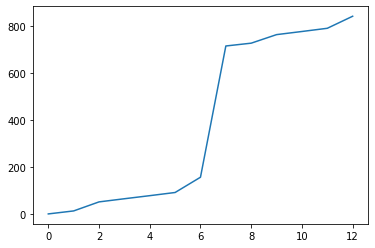

In [31]:
with open(motion_log) as f:
    data = f.read()

data = data.replace("nan", "-1")
data = data.replace("}", "},")
data = 'var = [' + data + ']'


print(data)
exec(data)
print(var)

y = [a['time'] for a in var]
print(y)
plt.plot(range(len(y)), y)
plt.show()